# Monday

Workflow:  using Jupyter notebooks as notes, along with a python class where functions will be written.

In [74]:
# my python file
import src.analytics as tics
import seaborn as sns
tics

<module 'src.analytics' from '/Users/tbot/Dropbox/0_galvanize/0_TODAY/Analyzing-Network-Traffic_kdd99/src/analytics.py'>

1- create gh repo
	- get .gitignore

2- create Jupyter Notebook for data

3- create a python class and import it into jupyter

--- commit

4- pull down the data into the repo
    - modify gitignore to ignore the data
--- commit

### write function to use bash to create samples from the data set

-- commit

In [89]:
# On OSX requires brew install coreutils, using gshuf instead of shuf
sample_name = 'data/sample_random_subset.csv'

tics.create_random_samples('data/kddcup.data_10_percent', 5000, sample_name)

### Get some Initial metrics

In [90]:
# more imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### As the name list that accompanies the data set did not have all the field names, I cross referenced with a `sql` file at https://github.com/myui/hivemall/wiki/KDD-cup-1999-network-intrusion-dataset-%231 .  This matched the order displayed with the data set as well as with other tables out on the webs.

In [91]:
# Create list of column names
columns = ['duration',
           'protocol_type',
           'service',
           'flag',
           'src_bytes',
           'dst_bytes',
           'land',
           'wrong_fragment',
           'urgent',
           'hot',
           'num_failed_logins',
           'logged_in',
           'num_compromised',
           'root_shell',
           'su_attempted',
           'num_root',
           'num_file_creations',
           'num_shells',
           'num_access_files',
           'num_outbound_cmds',
           'is_host_login',
           'is_guest_login',
           'count',
           'srv_count',
           'serror_rate',
           'srv_serror_rate',
           'rerror_rate',
           'srv_rerror_rate',
           'same_srv_rate',
           'diff_srv_rate',
           'srv_diff_host_rate',
           'dst_host_count',
           'dst_host_srv_count',
           'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate',
           'dst_host_srv_serror_rate',
           'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate',
           'label']
df = pd.read_csv(sample_name, header=None)
df.columns = columns
# df = pd.read_csv(sample_name)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
1,0,tcp,http,REJ,0,0,0,0,0,0,...,255,1.00,0.00,1.0,0.11,0.0,0.0,1.0,1.0,normal.
2,0,tcp,private,S0,0,0,0,0,0,0,...,2,0.01,0.07,0.0,0.00,1.0,1.0,0.0,0.0,neptune.
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0,smurf.
4,0,tcp,private,S0,0,0,0,0,0,0,...,11,0.04,0.07,0.0,0.00,1.0,1.0,0.0,0.0,neptune.


In [92]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,54.864400,1.918204e+03,565.363400,0.000200,0.007000,0.0,0.026800,0.000200,0.144800,0.005800,...,233.628800,188.35400,0.751348,0.033226,0.604408,0.006266,0.179174,0.178848,0.054732,0.054476
std,757.196609,7.269102e+04,3175.624523,0.014142,0.141968,0.0,0.614294,0.014142,0.351934,0.090377,...,63.428792,106.27793,0.412990,0.117803,0.480842,0.041450,0.382736,0.383061,0.223662,0.224470
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,40.75000,0.317500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.00000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31061.000000,5.133876e+06,78636.000000,1.000000,3.000000,0.0,30.000000,1.000000,1.000000,4.000000,...,255.000000,255.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
duration                       5000 non-null int64
protocol_type                  5000 non-null object
service                        5000 non-null object
flag                           5000 non-null object
src_bytes                      5000 non-null int64
dst_bytes                      5000 non-null int64
land                           5000 non-null int64
wrong_fragment                 5000 non-null int64
urgent                         5000 non-null int64
hot                            5000 non-null int64
num_failed_logins              5000 non-null int64
logged_in                      5000 non-null int64
num_compromised                5000 non-null int64
root_shell                     5000 non-null int64
su_attempted                   5000 non-null int64
num_root                       5000 non-null int64
num_file_creations             5000 non-null int64
num_shells             

### Some Histograms

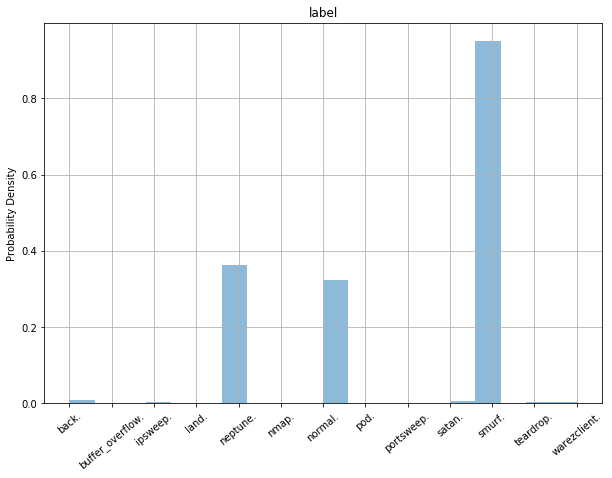

In [94]:
tics.plot_hist_basic(df, 'label')

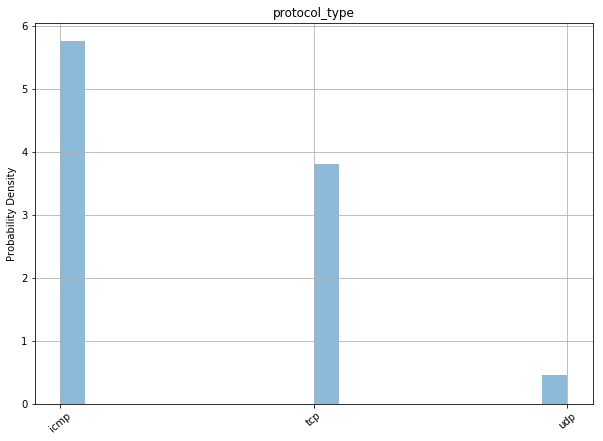

In [95]:
tics.plot_hist_basic(df, 'protocol_type')

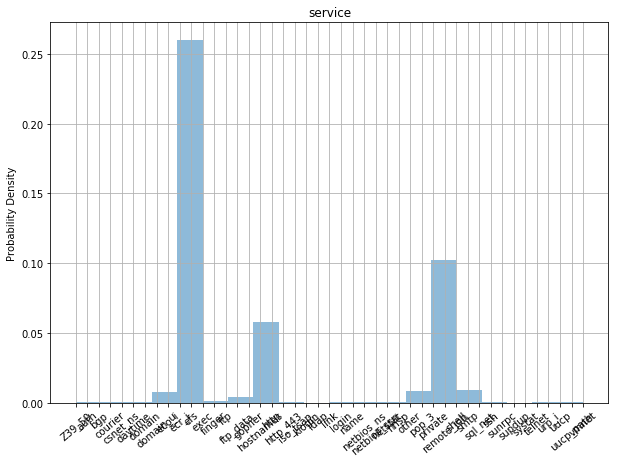

In [96]:
tics.plot_hist_basic(df, 'service')

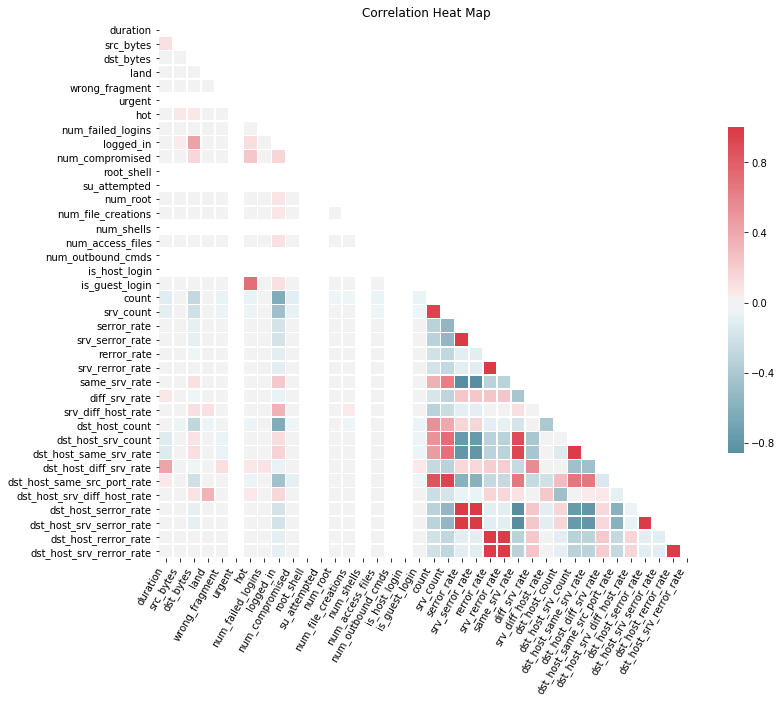

In [97]:
tics.corr_heat(df)